# Projet classification de données hyperspectrales

Les images hyperspectrales sont un type de données que nous avez déjà étudiées et traitées dans un des tout premier TP. Une image hyperspectrale correspond à une image dont le contenu spectral (aka. le nombre de couleurs) est enrichi par rapport aux images RGB acquises par exemple avec vos téléphonnes portable. 


L'objectif de ce mini-projet est une compétition (entre vous) pour la classification des pixels d'une image hyperspectrale.


Vous allez avoir à disposition une image hyperspectrale (survol de l'Université de Houston). Votre objectif est de déterminer automatiquement la nature des pixels qui composent l'image.

## Lecture des données

Vous avez à votre disposition le fichier `houston.npz` que nous allons ouvrir et analyser.

Commençon par quelques imports utiles.

In [2]:
import numpy as np
import collections
import matplotlib.pyplot as plt
from matplotlib import cm


In [3]:
houston = np.load('houston.npz')

La variable `houston` comprend un ensemble de deux numpy arrays :

In [4]:
hyp = houston["hyp_img"] # image hyperspectrale
label = houston["label_img"] # données d'apprentissage

dont les dimensions sont les suivantes :

In [5]:
print(hyp.shape)
print(label.shape)

(1202, 4768, 48)
(1202, 4768)


## Visualisation des données

La variable `hyp` correspond à l'image hyperspectrale. Nous sélectionnons trois bandes pour la visualisation.

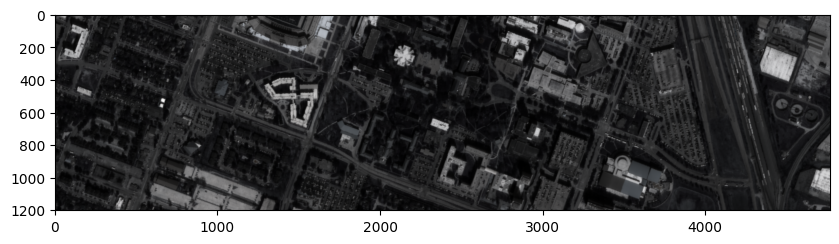

In [20]:
# Bands selected
# nbands=[35,20,5]
nbands=[20,21,22]

plt.figure(figsize=(10,15))
plt.imshow(hyp[:,:,nbands])
plt.show()

L'image `label` donne pour chaque pixel de l'image une information sur la classe du pixel avec la nomenclature suivante:
0 – inconnu (à ne pas utiliser !)
1 – Herbes saines
2 – Herbes en état de stress hydrique
3 – Conifères
4 - Feuillus
5 – Bâtiments résidentiels
6 – Bâtiments non-résidentiels
7 – Routes
8 – Trottoirs
9 – Carrefour
10 – Grands axes routiers
11 – Stationnements asphaltés
12 – Voitures

La fonction suivante permet de visualiser cette image. Les pixels blancs indiquent les endroits où les étiquettes ne sont pas disponibles, qui correspondent à la **classe 0**.

In [7]:
def viz_label_img(label_img):
    N = len(np.unique(label_img)) # nombre d'étiquettes uniques
    colours = cm.get_cmap("tab10",N)
    cmap = colours(np.linspace(0, 1, N))  # obtenir une image RGB
    cmap[0,-1] = 0  # transparent pour les pixels à étiquetter
    display_img = cmap[label_img.flatten()]
    display_img = display_img.reshape((label_img.shape[0], label_img.shape[1], -1))
    return display_img

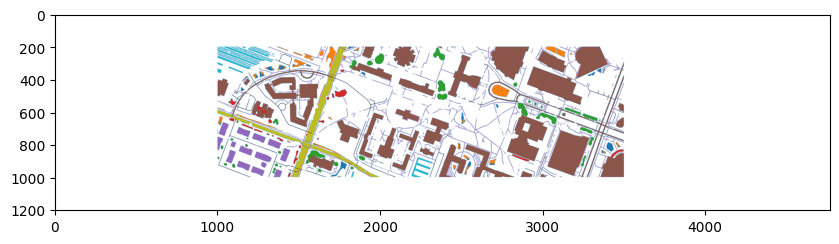

In [8]:
plt.figure(figsize=(10,15))
plt.imshow(viz_label_img(label))
plt.show()

## Objectif du challenge

Sur la visualisation précédente, vous voyez beaucoup de pixels blancs pour laquelle la classe n'est pas connue. 

Votre **objectif** est d'obtenir la classe de tous les pixels de l'image `img` avec une méthode aussi **précise** que possible. 

L'évaluation prendra en compte les éléments suivants:
1. La qualité du protocole expérimental mis en place, et sa **justification**
2. Les éventuels pré-traitement utilisés
3. Les méthodes de classification utilisées (toutes les méthodes implémentées par scikit-learn peuvent être utilisées, même celles que nous n'avons pas vu en cours)
4. La recherche d'une solution aussi précise que possible et le choix des métriques utilisées

## Rendu

1. Code

Vous crééerez un projet GIT sous https://forgens.univ-ubs.fr/gitlab/ auquel j'aurais accès. 
Ce projet doit contenir tous vos développements en Python sous forme de notebooks ou scripts.

2. Meilleures prédictions

Sous Moodle, un.e membre du groupe remettra un fichier `.npy` dont la structure est équivalente à celle de `label` mais où chaque pixel a une valeur de 1 à 12 (pas de 0) représentant une des classes à prédire.